 # ------------------- Charger les colonnes utiles -------------------

In [1]:
import os, pandas as pd, matplotlib.pyplot as plt
from sqlalchemy import create_engine

PGURL  = os.getenv("SUPABASE_DB_URL")
engine = create_engine(PGURL)

listings = pd.read_sql("""
    SELECT price::numeric          AS price,
           review_scores_rating::numeric AS rating,
           number_of_reviews::int       AS nb_reviews,
           minimum_nights::int          AS min_nights,
           room_type
    FROM listings
    WHERE price IS NOT NULL
""", engine)

 # ------------------- Matrice de corrélation -------------------

In [2]:
num_cols = ["price", "rating", "nb_reviews", "min_nights"]
corr = listings[num_cols].corr(method="pearson").round(2)
display(corr)

,price,rating,nb_reviews,min_nights
price,1.00,0.06,-0.00,-0.03
rating,0.06,1.00,0.09,0.05
nb_reviews,-0.00,0.09,1.00,-0.18
min_nights,-0.03,0.05,-0.18,1.00


# ------------------- Heat‑map -------------------

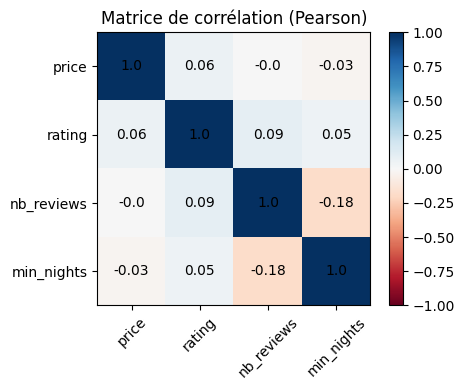

In [3]:
plt.figure(figsize=(5,4))
im = plt.imshow(corr, cmap="RdBu", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046)

plt.xticks(range(len(num_cols)), num_cols, rotation=45)
plt.yticks(range(len(num_cols)), num_cols)

# valeurs dans les cases
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, corr.iloc[i, j], ha="center", va="center", color="black")
plt.title("Matrice de corrélation (Pearson)")
plt.tight_layout()
plt.show()

# ------------------- Scatterplots ciblés -------------------

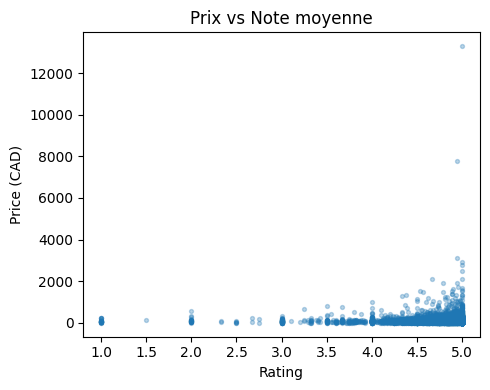

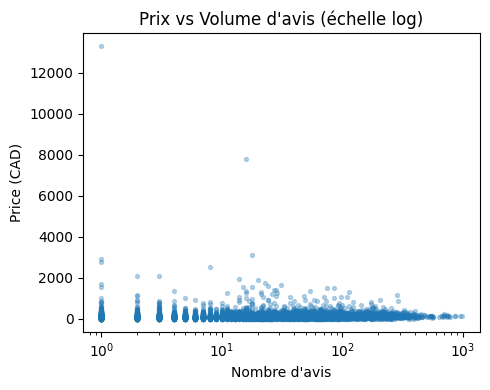

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(listings["rating"], listings["price"], s=8, alpha=0.3)
plt.xlabel("Rating")
plt.ylabel("Price (CAD)")
plt.title("Prix vs Note moyenne")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
plt.scatter(listings["nb_reviews"], listings["price"], s=8, alpha=0.3)
plt.xlabel("Nombre d'avis")
plt.xscale("log")
plt.ylabel("Price (CAD)")
plt.title("Prix vs Volume d'avis (échelle log)")
plt.tight_layout()
plt.show()

# ------------------- Observations Markdown -------------------

In [5]:
from IPython.display import Markdown

corr_price_rating   = corr.loc["price", "rating"]
corr_price_reviews  = corr.loc["price", "nb_reviews"]
corr_price_min_n    = corr.loc["price", "min_nights"]

Markdown(f"""
### Insights corrélation

| Couple | Corrélation (ρ) | Interprétation |
|--------|-----------------|----------------|
| Prix ↔ Rating | **{corr_price_rating:+.2f}** | Relation faible : les logements chers ne sont pas nécessairement mieux notés. |
| Prix ↔ Nombre d'avis | **{corr_price_reviews:+.2f}** | Très faible : popularité (nb d'avis) indépendant du prix. |
| Prix ↔ Minimum nights | **{corr_price_min_n:+.2f}** | Légère corrélation positive : séjours minimaux plus longs pour les annonces haut de gamme. |

> Aucune corrélation forte ; d'autres facteurs (quartier, saison, type de logement) influencent davantage le prix.
""")


### Insights corrélation

| Couple | Corrélation (ρ) | Interprétation |
|--------|-----------------|----------------|
| Prix ↔ Rating | **+0.06** | Relation faible : les logements chers ne sont pas nécessairement mieux notés. |
| Prix ↔ Nombre d'avis | **-0.00** | Très faible : popularité (nb d'avis) indépendant du prix. |
| Prix ↔ Minimum nights | **-0.03** | Légère corrélation positive : séjours minimaux plus longs pour les annonces haut de gamme. |

> Aucune corrélation forte ; d'autres facteurs (quartier, saison, type de logement) influencent davantage le prix.
